# Lab 06: Harmonograph

In [1]:
%matplotlib inline

import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot
import matplotlib.pyplot as plt
import numpy as np

resol = 0.001
amp = 100
step = 10000

## Device for harmonograph

<a href="https://www.youtube.com/watch?v=ck_JY-Z5kZI"><img src="harmonograph.jpg"></a>

## Amination

In [4]:
fx = 1
fy = 2
px = np.pi/2
py = 0

In [5]:
%%capture
from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

cycle = 4
f = min(fx,fy)
lengthtime = cycle * 1/f
delay = 0.01
frame_num = round(lengthtime/delay)

qx = 2 * np.pi * fx * delay
qy = 2 * np.pi * fy * delay

fig, ax = plt.subplots()
ax.set_xlim((-amp*1.6, amp*1.6))
ax.set_ylim((-amp*1.6, amp*1.6))
line, = ax.plot([], [], 'o')

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    x = amp * np.sin(qx*i + px)
    y = amp * np.sin(qy*i + py)
    dx = [x, amp*1.2, x]
    dy = [-amp*1.2, y, y]
    line.set_data(dx, dy)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=delay*1000, blit=True)

In [6]:
HTML(anim.to_jshtml())

## Unison (1:1)

In [2]:
def mixTwoSound(f1, ratio):
    f2 = ratio * f1
    wave = thinkdsp.sin_wave(f1, 2)
    wave = wave + thinkdsp.sin_wave(f2, 2)
    wave.normalize()
    return wave

In [3]:
def make_harmonograph(fx, fy, px, py):
    t = np.arange(0,step*resol,resol)           # a list of time moments
    x = amp * np.sin(2*np.pi * fx * t + px)     # a list of x-coordinates
    y = amp * np.sin(2*np.pi * fy * t + py)     # a list of y-coordinates

    plt.axis([-amp*1.6, amp*1.6, -amp*1.2, amp*1.2])
    plt.axis('off')
    plt.plot(x,y)
    plt.plot(x[0], y[0], 'ro')

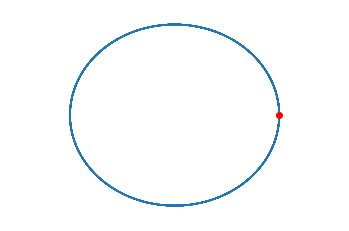

In [7]:
make_harmonograph(fx = 1, fy = 1, px = np.pi/2, py = 0)
plt.show()

In [8]:
wave = mixTwoSound(440,1/1)
wave.make_audio()

## Near Unison (1:0.99)

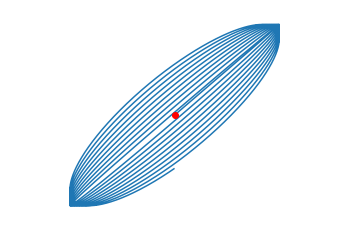

In [9]:
make_harmonograph(fx = 1, fy = 0.99, px = 0, py = 0)
plt.show()

In [10]:
wave = mixTwoSound(440,1/0.99)
wave.make_audio()

## Near Unison (1:1.1)

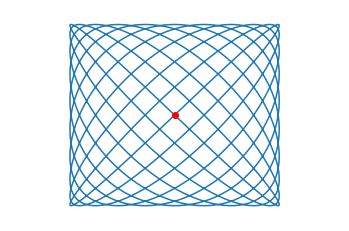

In [11]:
make_harmonograph(fx = 1, fy = 1.1, px = 0, py = 0)
plt.show()

In [12]:
wave = mixTwoSound(440,1/1.1)
wave.make_audio()

## Octave (2:1)

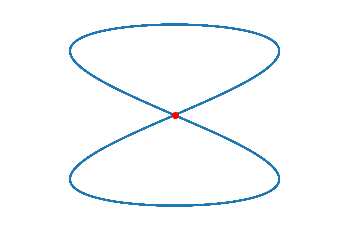

In [13]:
make_harmonograph(fx = 2, fy = 1, px = 0, py = 0)
plt.show()

In [14]:
wave = mixTwoSound(440,2/1)
wave.make_audio()

## Fifth (3:2)

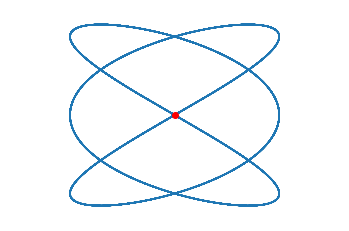

In [15]:
make_harmonograph(fx = 3, fy = 2, px = 0, py = 0)
plt.show()

In [16]:
wave = mixTwoSound(440,3/2)
wave.make_audio()

## Fourth (4:3)

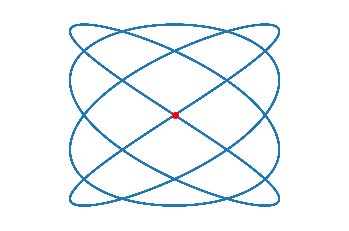

In [17]:
make_harmonograph(fx = 4, fy = 3, px = 0, py = 0)
plt.show()

In [18]:
wave = mixTwoSound(440,4/3)
wave.make_audio()

## Third (5:4)

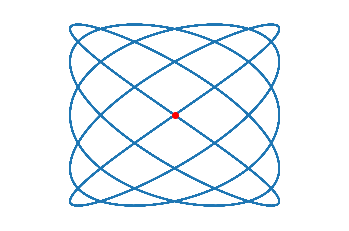

In [19]:
make_harmonograph(fx = 5, fy = 4, px = 0, py = 0)
plt.show()

In [20]:
wave = mixTwoSound(440,5/4)
wave.make_audio()

## Tritone (45:32)

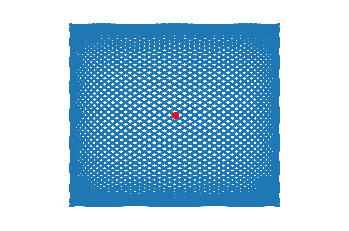

In [21]:
make_harmonograph(fx = 45, fy = 32, px = 0, py = 0)
plt.show()

In [22]:
wave = mixTwoSound(440,45/32)
wave.make_audio()